# Triangle Counting

These are translations of the methods for triangle counting from LAGraph_tricount()

In [13]:
from pygraphblas import *
from pygraphblas.demo.gviz import *

M = Matrix.random(UINT64, 10, 10, 100, no_diagonal=True, make_symmetric=True, make_pattern=True, seed=42)

In [9]:
def cohen(A, U, L):
    return L.mxm(U, mask=A).reduce_int() // 2
    
cohen(M, M.triu(), M.tril())

990624

80
31
84


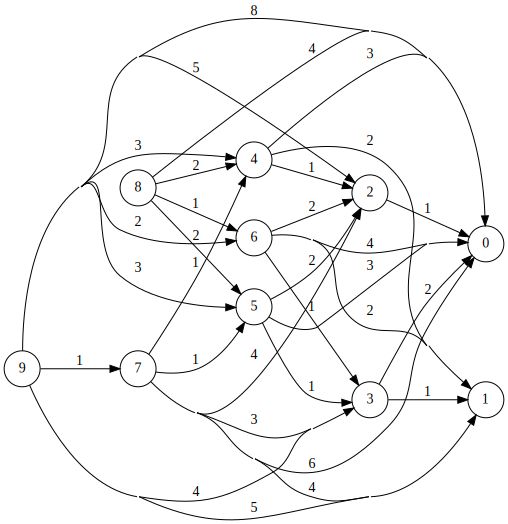

In [22]:
def sandia(A, L):
    return L.mxm(L, mask=L)

print(M.nvals)
S = sandia(M, M.tril())
print(S.nvals)
print(S.reduce_int())
draw(S, label_vector=None)

In [6]:
%timeit -n 10 sandia(M, M.triu())

9.62 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
def sandia_dot(A, U, L):
    return L.mxm(U.transpose(), mask=L).reduce_int()

%timeit -n 10 sandia_dot(M, M.triu(), M.tril())

10.5 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%timeit -n 10 sandia_dot(M, M.tril(), M.triu())

10.5 ms ± 3.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
